# Weather Forecast Classification using Navie Bayeas & Random Forests

Link to the Dataset : https://www.kaggle.com/muthuj7/weather-dataset/data

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import sklearn.metrics
from sklearn.ensemble import RandomForestClassifier

In [2]:
# extract the dataset from the csv and convert into pandas dataframe 
df = pd.read_csv(r'C:\Users\prajw\ML\weather\weatherHistory.csv') 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [4]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [5]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


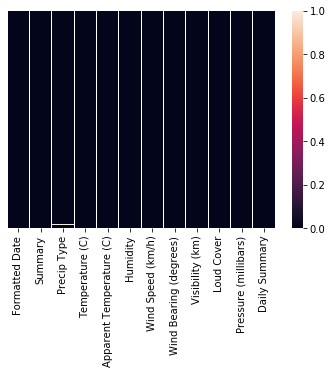

In [6]:
# check t5he null values in the dataset using heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=True)

In [7]:
le=LabelEncoder()
df['Summary']=le.fit_transform(df['Summary'])

In [8]:
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,19,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,19,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,17,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,19,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,17,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,19,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,19,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,19,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,19,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


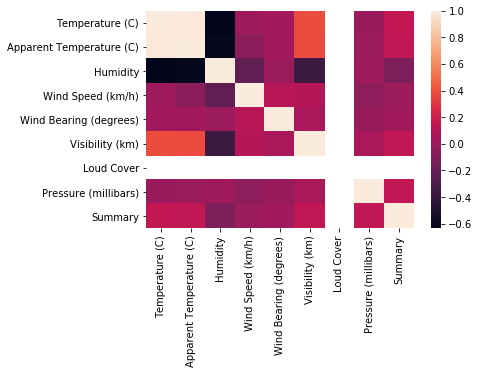

In [9]:
# reposition of the index
col = list(df)
col.insert(-1, col.pop(col.index('Summary')))
df = df.reindex(columns= col)

# coorrelation heatmap
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [10]:
# dropping unwanted coluns which are notuseful for the analysis
df.drop(['Formatted Date','Loud Cover','Daily Summary','Wind Bearing (degrees)'],axis=1 , inplace=True)

In [11]:
df.shape

(96453, 8)

In [12]:
# to check null values in the dataset
df.isna().sum()

Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Visibility (km)               0
Pressure (millibars)          0
Summary                       0
dtype: int64

In [13]:
# to check the data imbalance 
df['Precip Type'].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [14]:
df['Precip Type'].fillna(method='ffill',inplace=True,axis=0)
df['Precip Type'].value_counts()
# there huge data imbalance in the Precip Type so better we drop it for now
df.drop('Precip Type',axis=1,inplace=True)

In [15]:
df.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars),Summary
0,9.472222,7.388889,0.89,14.1197,15.8263,1015.13,19
1,9.355556,7.227778,0.86,14.2646,15.8263,1015.63,19
2,9.377778,9.377778,0.89,3.9284,14.9569,1015.94,17
3,8.288889,5.944444,0.83,14.1036,15.8263,1016.41,19
4,8.755556,6.977778,0.83,11.0446,15.8263,1016.51,17


In [16]:
# spliting the dataset
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [17]:
x

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,15.8263,1015.13
1,9.355556,7.227778,0.86,14.2646,15.8263,1015.63
2,9.377778,9.377778,0.89,3.9284,14.9569,1015.94
3,8.288889,5.944444,0.83,14.1036,15.8263,1016.41
4,8.755556,6.977778,0.83,11.0446,15.8263,1016.51
...,...,...,...,...,...,...
96448,26.016667,26.016667,0.43,10.9963,16.1000,1014.36
96449,24.583333,24.583333,0.48,10.0947,15.5526,1015.16
96450,22.038889,22.038889,0.56,8.9838,16.1000,1015.66
96451,21.522222,21.522222,0.60,10.5294,16.1000,1015.95


In [18]:
y

0        19
1        19
2        17
3        19
4        17
         ..
96448    19
96449    19
96450    19
96451    19
96452    19
Name: Summary, Length: 96453, dtype: int32

In [19]:
x.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.392847,-0.005447
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.381718,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,-0.369173,0.005454
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.100749,-0.049263
Visibility (km),0.392847,0.381718,-0.369173,0.100749,1.000000,0.059818
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,0.059818,1.000000


In [20]:
# dropping Apparent Temperature because the correlation between temperature and temperature is almost equal to 1
x.drop(['Apparent Temperature (C)'],axis=1,inplace=True)
x.shape

(96453, 5)

In [21]:
# spliting the dataset to train and test 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
x_columns=x.columns

In [22]:
# checking the shape  
print('x_train and x_test shape',x_train.shape,'&',x_test.shape)
print('y_train and y_test shape',y_train.shape,'&',y_test.shape)

x_train and x_test shape (67517, 5) & (28936, 5)
y_train and y_test shape (67517,) & (28936,)


In [23]:
# normalizing the dataset
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
x_train

array([[-0.37909754,  0.99751988,  0.01198909, -0.52794971,  0.01301243],
       [-0.31214729, -0.12891856, -0.19279389,  0.05554261,  0.14020173],
       [ 1.87741696, -1.46016399,  1.46175952,  0.25131964,  0.1524464 ],
       ...,
       [ 1.06237044, -0.43612905,  1.42685333,  0.22060952,  0.15037688],
       [-1.48057469,  0.79271289,  3.93777193, -2.38207336,  0.09700049],
       [ 0.43594898,  0.53670415, -0.62330357,  1.08817048,  0.17348653]])

In [24]:
# converting array tino the datafraame
x_train=pd.DataFrame(x_train,columns=x_columns)
x_test=pd.DataFrame(x_test,columns=x_columns)
x_train

,Temperature (C),Humidity,Wind Speed (km/h),Visibility (km),Pressure (millibars)
0,-0.379098,0.997520,0.011989,-0.527950,0.013012
1,-0.312147,-0.128919,-0.192794,0.055543,0.140202
2,1.877417,-1.460164,1.461760,0.251320,0.152446
3,-0.267320,1.151125,-0.001973,-0.988602,0.117437
4,-1.439240,0.741511,-1.565771,-0.788986,0.227380
...,...,...,...,...,...
67512,0.807377,-0.333726,0.370359,-0.086492,0.112263
67513,-0.495533,0.690309,1.364022,-0.128718,0.001026
67514,1.062370,-0.436129,1.426853,0.220610,0.150377
67515,-1.480575,0.792713,3.937772,-2.382073,0.097000


In [25]:
# training and testing the model using Navie Bayeas
nb=GaussianNB()
# train the model
nb.fit(x_train,y_train)
# testing the model 
y_predictions=nb.predict(x_test)

In [26]:
# checking the accuarcy of the predication
sklearn.metrics.accuracy_score(y_test,y_predictions)

0.4726983688139342

In [27]:
# training and testing the model using RandomForestClassifier
rf= RandomForestClassifier()
# train the model
rf.fit(x_train,y_train)
# testing the model 
y_predictions=rf.predict(x_test)

In [28]:
# # checking the accuarcy of the predication
sklearn.metrics.accuracy_score(y_test,y_predictions)

0.5585429914293614

In [29]:
#printing out the feature importances assigned by the RandomforestClassifier while training hte model 
print(np.array(x_columns))
print(rf.feature_importances_)

['Temperature (C)' 'Humidity' 'Wind Speed (km/h)' 'Visibility (km)'
 'Pressure (millibars)']
[0.20789217 0.15378915 0.199129   0.22917066 0.21001902]
